## Vacinas
Fonte: OMS (https://www.who.int/)

Dados utilizados para este Lab: excel disponibilizado pela Organização Mundial da Saúde.

Este é um Lab de estudos do curso de Pós Graduação em Ciência de Dados e Inteligência Artificial - PUCRS

Avaliar como podemos visualizar, e o que será preciso pré processar deste conjunto de dados para levantar informações sobre a eficiência das vacinas.

Importando as bibliotecas necessárias para este Lab

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import missingno as msno

1. Etapa -> ler o arquivo, verificar quantas abas contém e transforma-las em um único dataframe.

In [3]:
excel_incidence = pd.read_excel('http://bit.ly/ds_vacina_incidence', sheet_name=None)

In [4]:
excel_incidence.keys()

dict_keys(['Readme Incidence', 'CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever', 'Reg_&_Global_Incidence'])

In [5]:
sheets = ['CRS', 'Diphtheria', 'JapEnc', 'Measles', 'Mumps', 'Ntetanus', 'Pertussis', 'Polio', 'Rubella', 'Ttetanus', 'Yfever']

2. Etapa -> concatenação
- separada a lista das sheets(abas do excel) que interessam
- o primeiro desafio é o de concatenação (termo usado para designar a operação de unir o conteúdo de duas strings), ou seja, pegar estes formatos e tentar trabalhar isto em um único data frame

In [6]:
df = pd.concat(pd.read_excel('http://bit.ly/ds_vacina_incidence', sheet_name=sheets), ignore_index=True)

In [7]:
df.head()

,WHO_REGION,ISO_code,Cname,Disease,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,EMR,AFG,Afghanistan,CRS,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUR,ALB,Albania,CRS,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFR,DZA,Algeria,CRS,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EUR,AND,Andorra,CRS,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFR,AGO,Angola,CRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Disease'].value_counts() # verificar se foram contempladas todas as doenças

ttetanus      194
CRS           194
pertussis     194
yfever        194
diphtheria    194
polio         194
measles       194
Rubella       194
Mumps         194
JapEnc        194
ntetanus      194
Name: Disease, dtype: int64

- será que tem dados ausentes?
- como está a completude dos dados?

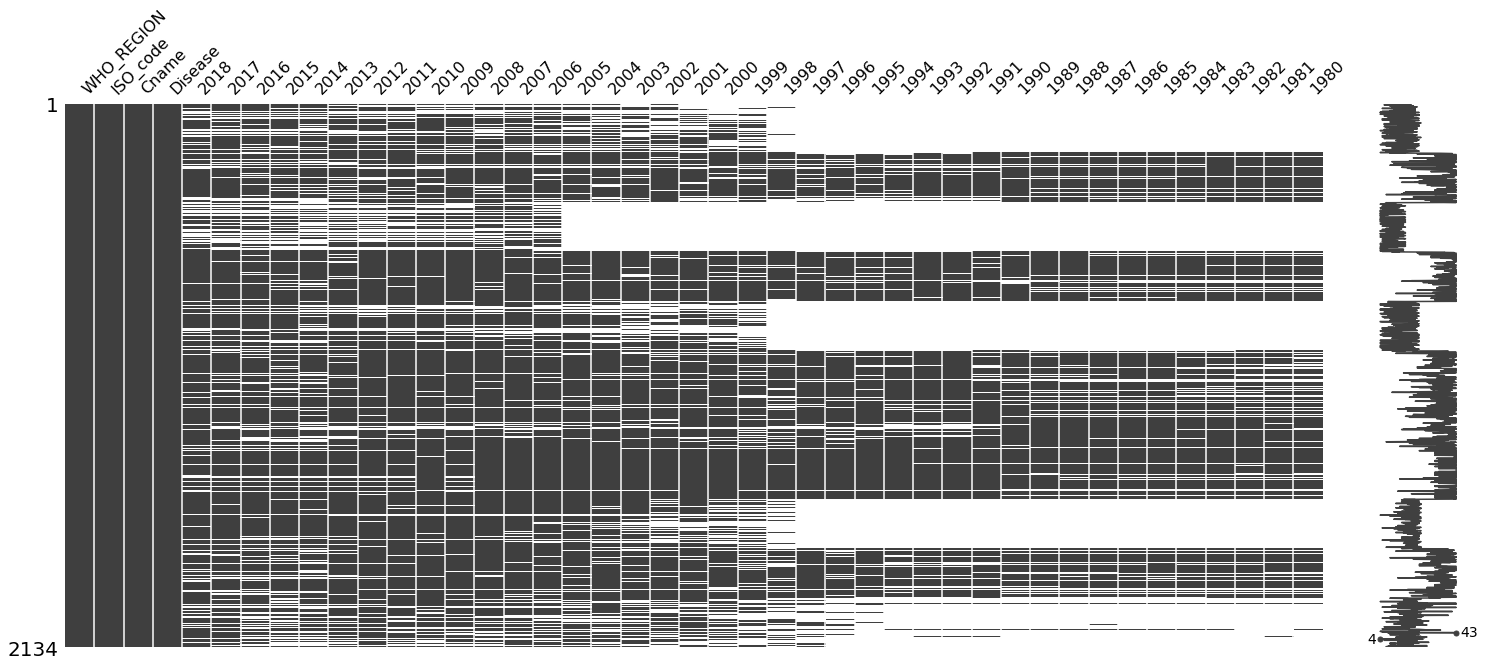

In [9]:
msno.matrix(df)

O que podemos perceber é que os dados de Região (WHO_Region), O nome do pais e a doença, estão completos, porém para algumas doenças no decorrer dos anos não houveram registros:
 - ou os dados não foram coletados
 - a doença não existia, etc

os motivos podem ser diversos, e nós precisamos sempre respeitar a natureza e a proveniência dos dados

3. Etapa -> Separar uma doença para análize : ex. *comportamento* do sarampo

In [11]:
sarampo = df[df['Disease'] == 'measles']

In [12]:
sarampo.head()

,WHO_REGION,ISO_code,Cname,Disease,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
582,EMR,AFG,Afghanistan,measles,2012.0,1511.0,638.0,1154.0,492.0,430.0,2787.0,3013.0,1989.0,2861.0,1599.0,1141.0,1990.0,1296.0,466.0,798.0,2486.0,8762.0,6532.0,3609.0,2205.0,NaN,NaN,NaN,NaN,NaN,NaN,792.0,1609.0,1170.0,4561.0,10357.0,8107.0,14457.0,16199.0,18808.0,20320.0,31107.0,32455.0
583,EUR,ALB,Albania,measles,1469.0,12.0,17.0,NaN,NaN,0.0,9.0,28.0,10.0,0.0,NaN,22.0,68.0,6.0,7.0,8.0,16.0,18.0,662.0,797.0,1901.0,2386.0,1204.0,15.0,29.0,7.0,0.0,0.0,NaN,136034.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,NaN,NaN
584,AFR,DZA,Algeria,measles,3356.0,112.0,41.0,63.0,0.0,25.0,18.0,112.0,103.0,107.0,217.0,0.0,944.0,2302.0,3289.0,15374.0,5862.0,2686.0,NaN,2503.0,3301.0,19573.0,21003.0,8204.0,5913.0,3141.0,8823.0,5969.0,1796.0,4169.0,2634.0,2500.0,3975.0,20114.0,22553.0,22126.0,29584.0,20849.0,15527.0
585,EUR,AND,Andorra,measles,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,AFR,AGO,Angola,measles,57.0,29.0,53.0,119.0,11699.0,8523.0,4458.0,1449.0,1190.0,2807.0,265.0,1014.0,765.0,258.0,29.0,1196.0,11945.0,9046.0,2219.0,350.0,2576.0,8183.0,251.0,635.0,5480.0,9273.0,16772.0,18382.0,29069.0,19820.0,21009.0,13368.0,15580.0,22822.0,22685.0,22589.0,30067.0,19714.0,29656.0


O resultado acima não contempla os princípios do Tidy data, onde a informação é representada em multiplas colunas

- transformar em tidy onde as variaveis indicadoras de cada linha passam a ser: 'WHO_REGION', 'ISO_code', 'Cname', 'Disease'

In [13]:
sarampo_tidy = pd.melt(sarampo,
                       id_vars=['WHO_REGION', 'ISO_code', 'Cname', 'Disease'],
                       var_name = 'Ano',
                       value_name = 'Qtd')

In [14]:
sarampo_tidy.head()

,WHO_REGION,ISO_code,Cname,Disease,Ano,Qtd
0,EMR,AFG,Afghanistan,measles,2018,2012.0
1,EUR,ALB,Albania,measles,2018,1469.0
2,AFR,DZA,Algeria,measles,2018,3356.0
3,EUR,AND,Andorra,measles,2018,0.0
4,AFR,AGO,Angola,measles,2018,57.0


4. Etapa -> Total de casos de sarampo no mundo

In [16]:
total_sarampo = sarampo_tidy.groupby('Ano').sum()

In [17]:
total_sarampo.head()

,Qtd
Ano,
1980,3852242.0
1981,4078455.0
1982,3623758.0
1983,3586101.0
1984,3026973.0


In [20]:
total_sarampo = total_sarampo.reset_index() # transformar o indice Ano em coluna

In [21]:
total_sarampo.head()

,index,Ano,Qtd
0,0,1980,3852242.0
1,1,1981,4078455.0
2,2,1982,3623758.0
3,3,1983,3586101.0
4,4,1984,3026973.0


In [22]:
alt.Chart(total_sarampo).mark_circle(color='rebeccapurple').encode(
    x = 'Ano',
    y = 'Qtd',
    size = 'Qtd'
)

alt.Chart(...)

Depois de ter entendido como essas informações podem ser utilizadas, voltamos ao inicio com a pergunta:
- Qual é a eficácia das vacinas?

In [24]:
todas_tidy = pd.melt(df,
                     ['WHO_REGION', 'ISO_code', 'Cname', 'Disease'], 
                     var_name = 'Ano',
                     value_name = 'Qtd')             

In [28]:
totais_ano = todas_tidy.groupby(['Disease', 'Ano']).agg({'Qtd' :'sum'})

In [29]:
totais_ano = totais_ano.reset_index()

In [30]:
totais_ano.head()

,Disease,Ano,Qtd
0,CRS,1980,0.0
1,CRS,1981,0.0
2,CRS,1982,0.0
3,CRS,1983,0.0
4,CRS,1984,0.0


In [31]:
alt.Chart(totais_ano).mark_circle().encode(
    x = 'Disease',
    y = 'Ano',
    tooltip=['Disease', 'Qtd', 'Ano'],
    size = alt.Size('Qtd', scale=alt.Scale(range=[5,8000]), legend=None),
    color=alt.Color('Disease')

).configure_mark(opacity=0.5).properties(width=600).interactive()

alt.Chart(...)

O objetivo foi poder observar de maneira visual, o impacto que temos com a introdução de vacinas para a redução da ocorrencia destas doenças e no caso do sarampo (amarelo) o crescente aumento da doenca a partir de 2016 em decorrência da negligência das pessoas que deixaram de vacinar seus filhos.